## Solving:

## $H = \frac{- \hbar^2}{2 m} (\partial_x^2 + \partial_y^2) + V(x,y)$

## Import libraries

In [1]:
import kwant
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

import os.path
def save_image(name):
    folder = "./figures/"
    if os.path.exists(folder + name + ".png"):
        raise Exception("File already exist")
        return 0
    
    plt.savefig(folder + name + ".png", dpi=300)

## Create an “empty” tight binding system, define potential

In [2]:
#define variables, build square lattice
t = 1
W = 20
L = 30
L_well=10

a = 1
lat = kwant.lattice.square(a)
syst = kwant.Builder()

Text(0, 0.5, 'Height of potential')

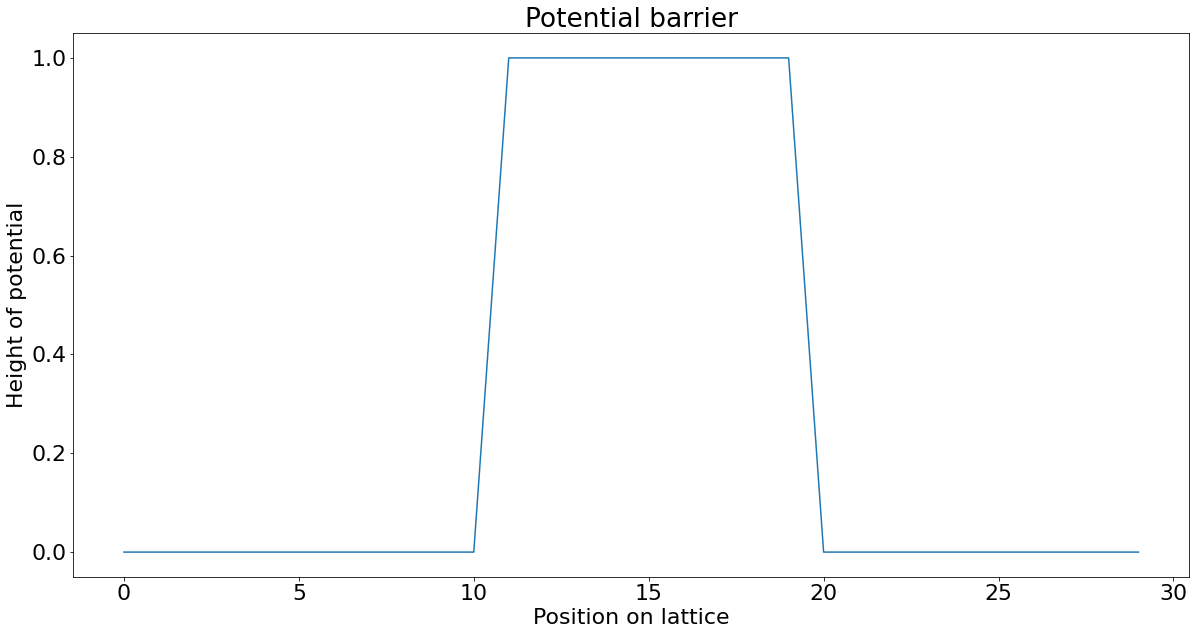

In [3]:
# look at the potential well
plot_data = []
plot_pos = []
for i in range(L):
    plot_pos.append(i)
    if (L - L_well) / 2 < i < (L + L_well) / 2:
        plot_data.append(1)
    else:
        plot_data.append(0)

plt.figure(figsize=(20,10))
plt.plot(plot_pos,plot_data)
plt.title("Potential barrier")
plt.xlabel("Position on lattice")
plt.ylabel("Height of potential")

## Set its matrix elements and hoppings.

In [4]:
#define potential
def potential(site, pot):
    (x, y) = site.pos
    if (L - L_well) / 2 < x < (L + L_well) / 2:
        return pot
    else:
        return 0

In [5]:
#add potential to on site
def onsite(site, pot):
    return 4 * t + potential(site, pot)

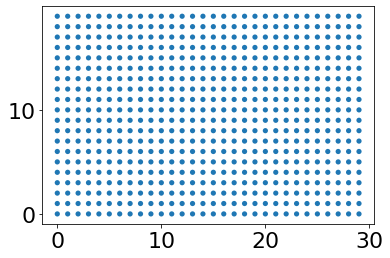

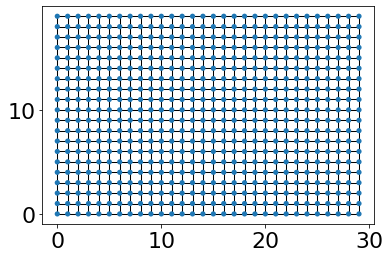

In [6]:
#define on site
syst[(lat(x, y) for x in range(L) for y in range(W))] = onsite
_ = kwant.plot(syst)
plt.show()

#define hopping
syst[lat.neighbors()] = -t
_ = kwant.plot(syst)
plt.show()

## Attach leads (tight binding systems with translational symmetry).

In [7]:
sym_lead = kwant.TranslationalSymmetry((-a, 0))
lead = kwant.Builder(sym_lead)

In [8]:
for j in range(W):
    lead[lat(0, j)] = 4 * t
    if j > 0:
        lead[lat(0, j), lat(0, j - 1)] = -t
    lead[lat(1, j), lat(0, j)] = -t

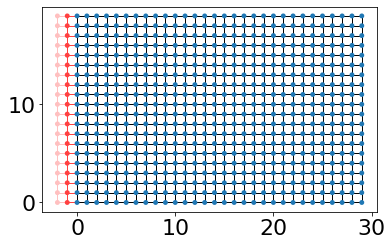

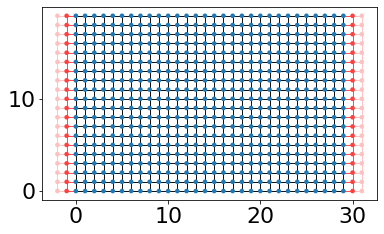

In [9]:
syst.attach_lead(lead)
_ = kwant.plot(syst)
plt.show()
syst.attach_lead(lead.reversed())
_ = kwant.plot(syst)

In [10]:
syst = syst.finalized()

## Pass the finalized system to a solver.

In [11]:
# Compute conductance
energy = 0.6 # the energy is fixed
welldepths = np.linspace(0.01,1,100) # the potential well's depth is varied
data = []

# iterating over well depths
for welldepth in welldepths:
    # calculate the scattering matrix
    smatrix = kwant.smatrix(syst, energy, params=dict(pot=-welldepth))
    # calculate the trensmission betweeen two leads
    data.append(smatrix.transmission(1, 0))

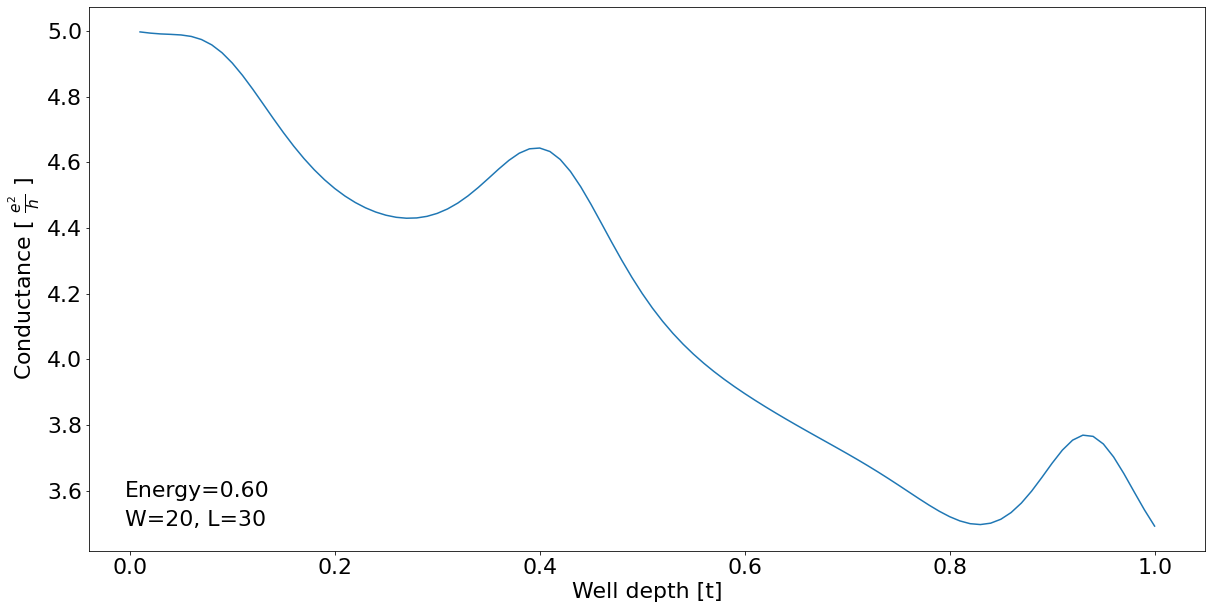

In [12]:
plt.figure(figsize=(20,10))
plt.plot(welldepths, data)
plt.xlabel("Well depth [t]")
plt.ylabel(r'Conductance [ $\frac{e^2}{h}$ ]')

plt.figtext(.15, .16, "W=%d, L=%d" %(W,L))
plt.figtext(.15, .2, "Energy=%.2f" %energy)

save_image("conductance3.3")
plt.show()